# SD207 Challenge Acoustic scene classification
#### WEI Chen, LUO Xi
#### Based on Python3.5

## 0 Imports

In [38]:
import numpy as np
import math
import librosa
from sklearn.neural_network import MLPClassifier
import time
from sklearn.preprocessing import StandardScaler, minmax_scale, scale
import pickle
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.decomposition import NMF, PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import nimfa
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix

## 1 Feature extraction

### 1.1 Read filename

In [2]:
txt_train = np.loadtxt("audio/train.txt",dtype=bytes).astype(str)
fn_train = txt_train[:,0]
labels_train = txt_train[:,1]
u,labels_train =  np.unique(labels_train, return_inverse=True)

txt_dev = np.loadtxt("audio/dev.txt",dtype=bytes).astype(str)
fn_dev = txt_dev[:,0]
labels_dev = txt_dev[:,1]
u,labels_dev =  np.unique(labels_dev, return_inverse=True)

fn_test = np.loadtxt("audio/test.txt",dtype=bytes).astype(str)

### 1.2 Extract MFCC & CQT features

In [38]:
def extract_features(fn, labels):
    for i,filename in enumerate(fn):
        print("Reading %d-th audio file..." %i)
        s,sr = librosa.load(filename)
        if i==0:
            mfcc = librosa.feature.mfcc(s, n_fft=8192, hop_length=8192, n_mfcc=40)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
            cqt = librosa.cqt(s, sr=sr, hop_length=8192, fmin=5, n_bins=24*11, bins_per_octave =24,real =True)
            nframe = mfcc.shape[1]
            X = np.c_[mfcc.T, mfcc_delta.T, mfcc_delta2.T, cqt.T]
            y = labels[i]*np.array([1]*nframe)
        else:
            mfcc = librosa.feature.mfcc(s, n_fft=8192, hop_length=8192, n_mfcc=40)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
            cqt = librosa.cqt(s, sr=sr, hop_length=8192, fmin=5, n_bins=24*11, bins_per_octave =24,real =True)
            X = np.r_[X, np.c_[mfcc.T, mfcc_delta.T, mfcc_delta2.T, cqt.T]]
            y = np.concatenate((y,labels[i]*np.array([1]*nframe)) , axis=0)
    return X, y

In [39]:
X_train, y_train = extract_features(fn_train, labels_train)
X_dev, y_dev = extract_features(fn_dev, labels_dev)
X_test = extract_features(fn_test, labels_train)[0]

Reading 0-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 1-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 2-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 3-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 4-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 5-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 6-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 7-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 8-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 9-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 10-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 11-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 12-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 13-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 14-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 15-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 16-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 17-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 18-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 19-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 20-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 21-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 22-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 23-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 24-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 25-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 26-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 27-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 28-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 29-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 30-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 31-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 32-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 33-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 34-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 35-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 36-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 37-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 38-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 39-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 40-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 41-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 42-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 43-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 44-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 45-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 46-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 47-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 48-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 49-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 50-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 51-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 52-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 53-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 54-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 55-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 56-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 57-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 58-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 59-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 60-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 61-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 62-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 63-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 64-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 65-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 66-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 67-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 68-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 69-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 70-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 71-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 72-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 73-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 74-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 75-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 76-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 77-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 78-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 79-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 80-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 81-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 82-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 83-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 84-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 85-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 86-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 87-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 88-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 89-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 90-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 91-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 92-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 93-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 94-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 95-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 96-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 97-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 98-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 99-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 100-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 101-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 102-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 103-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 104-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 105-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 106-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 107-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 108-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 109-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 110-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 111-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 112-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 113-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 114-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 115-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 116-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 117-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 118-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 119-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 120-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 121-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 122-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 123-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 124-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 125-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 126-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 127-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 128-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 129-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 130-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 131-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 132-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 133-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 134-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 135-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 136-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 137-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 138-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 139-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 140-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 141-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 142-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 143-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 144-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 145-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 146-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 147-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 148-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 149-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 150-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 151-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 152-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 153-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 154-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 155-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 156-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 157-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 158-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 159-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 160-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 161-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 162-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 163-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 164-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 165-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 166-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 167-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 168-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 169-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 170-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 171-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 172-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 173-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 174-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 175-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 176-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 177-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 178-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 179-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 180-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 181-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 182-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 183-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 184-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 185-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 186-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 187-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 188-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 189-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 190-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 191-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 192-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 193-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 194-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 195-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 196-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 197-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 198-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 199-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 200-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 201-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 202-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 203-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 204-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 205-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 206-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 207-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 208-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 209-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 210-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 211-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 212-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 213-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 214-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 215-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 216-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 217-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 218-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 219-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 220-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 221-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 222-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 223-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 224-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 225-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 226-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 227-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 228-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 229-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 230-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 231-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 232-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 233-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 234-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 235-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 236-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 237-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 238-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 239-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 240-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 241-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 242-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 243-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 244-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 245-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 246-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 247-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 248-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 249-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 250-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 251-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 252-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 253-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 254-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 255-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 256-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 257-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 258-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 259-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 260-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 261-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 262-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 263-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 264-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 265-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 266-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 267-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 268-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 269-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 270-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 271-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 272-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 273-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 274-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 275-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 276-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 277-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 278-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 279-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 280-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 281-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 282-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 283-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 284-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 285-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 286-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 287-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 288-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 289-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 290-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 291-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 292-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 293-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 294-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 295-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 296-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 297-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 298-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 299-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 300-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 301-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 302-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 303-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 304-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 305-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 306-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 307-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 308-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 309-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 310-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 311-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 312-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 313-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 314-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 315-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 316-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 317-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 318-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 319-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 320-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 321-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 322-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 323-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 324-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 325-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 326-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 327-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 328-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 329-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 330-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 331-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 332-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 333-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 334-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 335-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 336-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 337-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 338-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 339-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 340-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 341-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 342-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 343-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 344-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 345-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 346-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 347-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 348-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 349-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 350-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 351-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 352-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 353-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 354-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 355-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 356-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 357-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 358-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 359-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 360-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 361-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 362-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 363-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 364-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 365-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 366-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 367-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 368-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 369-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 370-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 371-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 372-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 373-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 374-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 375-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 376-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 377-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 378-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 379-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 380-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 381-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 382-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 383-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 384-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 385-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 386-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 387-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 388-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 389-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 390-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 391-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 392-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 393-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 394-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 395-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 396-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 397-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 398-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 399-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 400-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 401-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 402-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 403-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 404-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 405-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 406-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 407-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 408-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 409-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 410-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 411-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 412-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 413-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 414-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 415-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 416-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 417-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 418-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 419-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 420-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 421-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 422-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 423-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 424-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 425-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 426-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 427-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 428-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 429-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 430-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 431-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 432-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 433-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 434-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 435-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 436-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 437-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 438-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 439-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 440-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 441-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 442-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 443-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 444-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 445-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 446-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 447-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 448-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 449-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 450-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 451-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 452-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 453-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 454-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 455-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 456-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 457-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 458-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 459-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 460-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 461-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 462-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 463-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 464-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 465-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 466-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 467-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 468-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 469-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 470-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 471-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 472-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 473-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 474-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 475-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 476-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 477-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 478-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 479-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 480-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 481-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 482-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 483-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 484-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 485-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 486-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 487-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 488-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 489-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 490-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 491-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 492-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 493-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 494-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 495-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 496-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 497-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 498-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 499-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 500-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 501-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 502-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 503-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 504-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 505-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 506-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 507-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 508-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 509-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 510-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 511-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 512-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 513-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 514-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 515-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 516-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 517-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 518-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 519-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 520-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 521-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 522-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 523-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 524-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 525-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 526-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 527-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 528-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 529-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 530-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 531-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 532-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 533-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 534-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 535-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 536-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 537-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 538-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 539-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 540-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 541-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 542-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 543-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 544-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 545-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 546-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 547-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 548-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 549-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 550-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 551-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 552-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 553-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 554-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 555-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 556-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 557-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 558-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 559-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 560-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 561-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 562-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 563-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 564-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 565-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 566-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 567-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 568-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 569-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 570-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 571-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 572-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 573-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 574-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 575-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 576-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 577-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 578-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 579-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 580-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 581-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 0-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 1-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 2-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 3-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 4-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 5-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 6-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 7-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 8-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 9-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 10-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 11-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 12-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 13-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 14-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 15-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 16-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 17-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 18-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 19-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 20-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 21-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 22-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 23-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 24-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 25-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 26-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 27-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 28-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 29-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 30-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 31-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 32-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 33-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 34-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 35-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 36-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 37-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 38-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 39-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 40-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 41-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 42-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 43-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 44-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 45-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 46-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 47-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 48-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 49-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 50-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 51-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 52-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 53-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 54-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 55-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 56-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 57-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 58-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 59-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 60-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 61-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 62-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 63-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 64-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 65-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 66-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 67-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 68-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 69-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 70-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 71-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 72-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 73-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 74-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 75-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 76-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 77-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 78-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 79-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 80-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 81-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 82-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 83-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 84-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 85-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 86-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 87-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 88-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 89-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 90-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 91-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 92-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 93-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 94-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 95-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 96-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 97-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 98-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 99-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 100-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 101-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 102-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 103-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 104-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 105-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 106-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 107-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 108-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 109-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 110-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 111-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 112-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 113-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 114-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 115-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 116-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 117-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 118-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 119-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 120-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 121-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 122-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 123-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 124-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 125-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 126-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 127-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 128-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 129-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 130-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 131-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 132-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 133-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 134-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 135-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 136-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 137-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 138-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 139-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 140-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 141-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 142-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 143-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 144-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 145-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 146-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 147-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 148-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 149-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 150-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 151-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 152-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 153-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 154-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 155-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 156-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 157-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 158-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 159-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 160-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 161-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 162-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 163-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 164-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 165-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 166-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 167-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 168-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 169-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 170-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 171-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 172-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 173-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 174-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 175-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 176-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 177-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 178-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 179-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 180-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 181-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 182-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 183-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 184-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 185-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 186-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 187-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 188-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 189-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 190-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 191-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 192-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 193-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 194-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 195-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 196-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 197-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 198-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 199-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 200-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 201-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 202-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 203-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 204-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 205-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 206-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 207-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 208-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 209-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 210-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 211-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 212-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 213-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 214-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 215-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 216-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 217-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 218-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 219-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 220-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 221-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 222-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 223-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 224-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 225-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 226-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 227-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 228-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 229-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 230-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 231-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 232-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 233-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 234-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 235-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 236-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 237-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 238-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 239-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 240-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 241-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 242-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 243-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 244-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 245-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 246-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 247-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 248-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 249-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 250-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 251-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 252-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 253-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 254-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 255-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 256-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 257-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 258-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 259-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 260-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 261-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 262-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 263-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 264-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 265-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 266-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 267-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 268-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 269-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 270-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 271-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 272-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 273-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 274-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 275-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 276-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 277-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 278-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 279-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 280-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 281-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 282-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 283-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 284-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 285-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 286-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 287-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 288-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 289-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 0-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 1-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 2-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 3-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 4-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 5-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 6-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 7-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 8-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 9-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 10-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 11-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 12-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 13-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 14-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 15-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 16-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 17-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 18-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 19-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 20-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 21-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 22-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 23-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 24-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 25-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 26-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 27-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 28-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 29-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 30-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 31-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 32-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 33-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 34-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 35-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 36-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 37-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 38-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 39-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 40-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 41-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 42-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 43-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 44-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 45-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 46-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 47-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 48-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 49-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 50-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 51-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 52-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 53-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 54-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 55-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 56-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 57-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 58-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 59-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 60-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 61-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 62-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 63-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 64-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 65-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 66-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 67-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 68-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 69-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 70-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 71-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 72-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 73-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 74-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 75-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 76-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 77-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 78-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 79-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 80-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 81-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 82-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 83-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 84-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 85-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 86-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 87-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 88-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 89-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 90-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 91-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 92-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 93-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 94-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 95-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 96-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 97-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 98-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 99-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 100-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 101-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 102-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 103-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 104-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 105-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 106-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 107-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 108-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 109-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 110-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 111-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 112-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 113-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 114-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 115-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 116-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 117-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 118-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 119-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 120-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 121-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 122-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 123-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 124-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 125-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 126-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 127-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 128-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 129-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 130-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 131-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 132-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 133-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 134-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 135-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 136-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 137-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 138-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 139-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 140-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 141-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 142-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 143-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 144-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 145-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 146-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 147-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 148-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 149-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 150-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 151-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 152-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 153-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 154-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 155-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 156-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 157-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 158-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 159-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 160-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 161-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 162-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 163-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 164-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 165-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 166-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 167-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 168-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 169-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 170-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 171-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 172-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 173-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 174-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 175-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 176-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 177-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 178-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 179-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 180-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 181-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 182-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 183-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 184-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 185-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 186-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 187-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 188-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 189-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 190-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 191-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 192-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 193-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 194-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 195-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 196-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 197-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 198-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 199-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 200-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 201-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 202-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 203-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 204-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 205-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 206-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 207-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 208-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 209-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 210-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 211-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 212-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 213-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 214-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 215-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 216-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 217-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 218-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 219-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 220-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 221-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 222-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 223-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 224-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 225-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 226-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 227-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 228-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 229-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 230-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 231-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 232-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 233-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 234-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 235-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 236-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 237-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 238-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 239-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 240-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 241-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 242-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 243-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 244-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 245-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 246-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 247-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 248-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 249-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 250-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 251-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 252-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 253-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 254-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 255-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 256-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 257-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 258-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 259-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 260-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 261-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 262-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 263-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 264-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 265-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 266-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 267-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 268-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 269-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 270-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 271-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 272-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 273-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 274-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 275-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 276-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 277-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 278-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 279-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 280-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 281-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 282-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 283-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 284-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 285-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 286-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 287-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 288-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 289-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 290-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 291-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 292-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 293-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 294-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 295-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 296-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


Reading 297-th audio file...


C:\Program Files\Python35\lib\site-packages\librosa\core\constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)


### 1.4 Save features

In [9]:
pickle.dump(X_train, open('X_train_mfcc_cqt.txt', 'wb'))
pickle.dump(y_train, open('y_train_mfcc_cqt.txt', 'wb'))
pickle.dump(X_dev, open('X_dev_mfcc_cqt.txt', 'wb'))
pickle.dump(y_dev, open('y_dev_mfcc_cqt.txt', 'wb'))
pickle.dump(X_test, open('X_test_mfcc_cqt.txt', 'wb'))

### 1.5 Reload features

In [3]:
X_train = pickle.load(open('X_train_mfcc_cqt.txt', 'rb'))
y_train = pickle.load(open('y_train_mfcc_cqt.txt', 'rb'))
X_dev = pickle.load(open('X_dev_mfcc_cqt.txt', 'rb'))
y_dev = pickle.load(open('y_dev_mfcc_cqt.txt', 'rb'))
X_test = pickle.load(open('X_test_mfcc_cqt.txt', 'rb'))

## 2 Normalisation

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.fit_transform(X_test)

## 3 Classifier

### 3.1 MLP (finally adopted)

In [13]:
# Multi-layer Perceptron Classifier
n,p = X_train.shape
layersize = int(n/p+15)
clf = MLPClassifier(activation='relu', alpha=0.1,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(layersize, layersize), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.001,
       verbose=False, warm_start=True)
# clf=BaggingClassifier(base_estimator=clf, n_estimators=10)

begin = time.time()
clf.fit(X_train, y_train)
cost = time.time() - begin

print('Training time: % s seconds' % cost)
print('Score for frames on validatiion set:',clf.score(X_dev, y_dev))

Training time: 30.485364198684692 seconds
Score for frames on validatiion set: 0.580757769264


### 3.2 Perceptron (not adopted)

In [9]:
clf = Perceptron(n_iter=100)
begin = time.time()
clf.fit(X_train, y_train)
cost = time.time() - begin
print('Training time: % s seconds' % cost)
print('Score for frames on validatiion set:',clf.score(X_dev, y_dev))

Training time: 58.558663845062256 seconds
Score for frames on validatiion set: 0.467092379736


### 3.3 QDA (not adopted)

In [8]:
clf = QuadraticDiscriminantAnalysis()
begin = time.time()
clf.fit(X_train, y_train)
cost = time.time() - begin
print('Training time: % s seconds' % cost)
print('Score for frames on validatiion set:',clf.score(X_dev, y_dev))

Training time: 3.8148961067199707 seconds
Score for frames on validatiion set: 0.355427841635


### 3.4 GMM (not adopted)

In [12]:
clf = list()
likelihood = np.zeros([X_dev.shape[0],15])
begin = time.time()
for scene in range(15):
    clf.append(GaussianMixture(n_components=16).fit(X_train[y_train==scene], y_train[y_train==scene]))
    likelihood[:,scene] = clf[scene].score_samples(X_dev)
cost = time.time() - begin
y_frame = np.argmax(likelihood,axis=1)
print('Training time: % s seconds' % cost)
print('Score for frames on validatiion set:', y_frame[y_frame-y_dev==0].shape[0]/y_frame.shape[0])

Training time: 219.1344518661499 seconds
Score for frames on validatiion set: 0.1617283950617284


### 3.5 Bagging (finally adopted)

In [80]:
clf = BaggingClassifier(base_estimator=clf, n_estimators=10, max_samples =0.7)
begin = time.time()
clf.fit(X_train, y_train)
cost = time.time() - begin

print('Training time: % s seconds' % cost)
print(clf.score(X_dev, y_dev))

Training time: 212.41785883903503 seconds
0.592337164751


## 4 Prediction on files

### 4.1 Weighted majority Vote

In [17]:
def majority_vote(ys, ws, population):
    y = np.zeros(int(ys.shape[0]/population))
    votes = np.zeros(int(ys.shape[0]/population))
    for i in range(y.shape[0]):
        y[i]=np.argmax(np.bincount(ys[i*population:(i+1)*population] , weights=ws[i*population:(i+1)*population]) )
        votes[i]=np.max(np.bincount(ys[i*population:(i+1)*population] , weights=ws[i*population:(i+1)*population]) )
    return y.astype(int),votes

### 4.2 Prediction for files on validation set

In [19]:
print('Score for frames on validatiion set:', clf.score(X_dev, y_dev))
y_frame = clf.predict(X_dev)
y_proba = np.amax(clf.predict_proba(X_dev), axis = 1)
y_pred = majority_vote(y_frame.astype(int), y_proba, int(X_dev.shape[0]/fn_dev.shape[0]) )[0]
print('Score for files on validatiion set:', y_pred[y_pred-labels_dev==0].shape[0]/y_pred.shape[0])

Score for frames on validatiion set: 0.580757769264
Score for files on validatiion set: 0.6758620689655173


### 4.3 Confusion matrix

In [21]:
print(ConfusionMatrix(y_pred, labels_dev))

Predicted   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  __all__
Actual                                                                        
0          18   0   0   0   0   0   0   0   0   0   0   0   0   0   1       19
1           0  12   0   0   0   0   0   0   0   0   0   0   0   0   0       12
2           0   0   6   0   0   0   1   0   0   0   0   0   0   0   0        7
3           0   0   0  19   0   0   0   0   0   0   0   0   0   1   5       25
4           0   1   0   0  15   0   0   0   0   2   0   6   0   0   0       24
5           0   0   0   0   0  17   0   0   0   0   2   0   6   0   0       25
6           0   0   0   0   0   0  19   0   0   0   0   0   0   0   0       19
7           3   0   0   0   0   1   0  11   0   1   5   0   0   0   0       21
8           0   0   0   0   0   0   0   5  17   0   0   2   0   2   0       26
9           0   1  13   0   0   0   1   0   1  13   1   1   1   0   0       32
10          0   0   0   0   0   0   0   2   0   0  1

### 4.4 Expand training set

In [22]:
X_train = np.r_[X_train,X_dev]
y_train = np.r_[y_train,y_dev]
print('Size of expanded X_train', X_train.shape)

# Multi-layer Perceptron Classifier
n,p = X_train.shape
layersize = int(n/p+15)
clf = MLPClassifier(activation='relu', alpha=0.1,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(layersize, layersize), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.001,
       verbose=False, warm_start=True)
# clf=BaggingClassifier(base_estimator=clf, n_estimators=10)

begin = time.time()
clf.fit(X_train, y_train)
cost = time.time() - begin

print('Training time: % s seconds' % cost)
print('Score for frames on validatiion set:',clf.score(X_dev, y_dev))

Size of expanded X_train (70632, 384)
Training time: 106.7221450805664 seconds
Score for frames on validatiion set: 0.993954874415


cqt with all samples, 0.43 0.55, 52s
cqt+bagging 0.7,10, 0.44, 0.60, 0.68 349s
cqt+KNNreduction+bagging 0.47, 0.62
cqt+dev+KNNreduction+mlp+bagging 0.75
mfcc+dev+qda+bagging 0.73
mfcc4096+dev+mlp300,300 0.75 cv 0.55
mfcc+dev+gmm 0.59
mfcc+dev+qda+bagging 0.71
mfcc1024+dev+qda+bagging+boosting 0.75
mfcc+dev+deduction+qda+bagging 0.67
mfcc8192+qda+bagging 0.48 0.73
mfcc8192+qda+bagging+boosting 0.73
mfcc8192+dev+qda+bagging+boosting 0.75

mfcc8192+mlp 0.50
mfcc8192+mlp+bagging 0.54 0.66 0.75
mfcc8192+mlp400,300 0.52 0.65
mfcc8192+mlp500,300 0.52 0.63
mfcc8192+mlp400 0.52 0.65
mfcc8192+mlp800 0.53 0.65
mfcc8192+dev+mlp1192 0.53 0.65 0.80

cqt8192+dev+mlp 0.67
cqt8192+mfcc8192+dev+mlp 0.83
cqt8192+mfcc8192+dev+qda+bagging 0.62
cqt8192+mfcc8192+dev+mlp233,233 0.87
cqt8192+mfcc8192+dev+mlp300 0.85
cqt8192+mfcc8192+dev+mlp+bagging 233,233 0.86


cqt8192+mfcc8192+mlp160,160 0.58,0.67 0.818
cqt8192+mfcc8192+mlp300,300 0.57,0.67
cqt8192+mfcc8192+mlp160 0.56 0.64

cqt8192+mfcc40 8192+mlp233,233 0.53 0.66
cqt8192+mfcc40 8192+mlp137,137 0.55 0.65
cqt8192+mfcc40 8192+mlp138,100,50 0.58 0.68 0.73
cqt8192+mfcc40 8192+dev+mlp200,100,50 0.86
cqt8192+mfcc40 8192+dev+mlp200,200,50 0.89

### 4.5 Prediction for test set

In [24]:
y_frame=clf.predict(X_test)
y_proba = np.amax(clf.predict_proba(X_test), axis = 1)
y_pred = majority_vote(y_frame.astype(int), y_proba, int(X_test.shape[0]/fn_test.shape[0]) )[0]
np.savetxt('y_pred.txt', y_pred, fmt='%d')

### 4.6 Max voters histogram

Propotion of files that have >40% maority votes: 0.8590604026845637


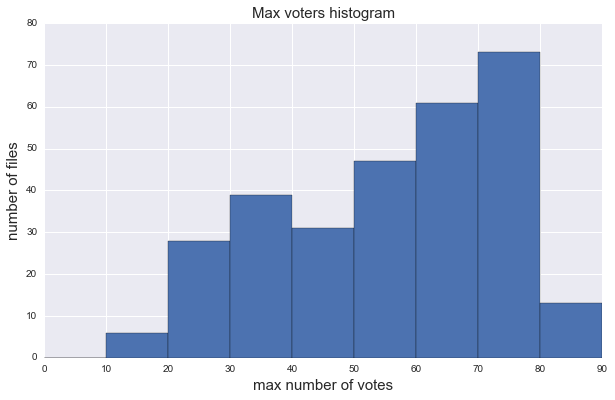

In [35]:
y_pred, votes = majority_vote(y_frame.astype(int), y_proba, int(X_test.shape[0]/fn_test.shape[0]) )
print('Propotion of files that have >40% maority votes:',votes[votes>0.4*X_test.shape[0]/fn_test.shape[0]].shape[0]/votes.shape[0])
plt.figure(figsize=(10,6))
plt.hist(votes,bins=9,range=(0,90) )
plt.ylabel('number of files',fontsize=15)
plt.xlabel('max number of votes',fontsize=15)
plt.title('Max voters histogram',fontsize=15)
plt.show()